In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

from IC.invisible_cities.reco import paolina_functions    as plf

In [2]:
evt_number = 7
filepath = f'/Users/halmamol/NEXT/nexus/'
filename_highE = 'NEW_NeutronGun_highE.next.h5'
filename_lowE = 'NEW_NeutronGun.next.h5'
ngenerated = 100000
h5file_highE = filepath+filename_highE
h5file_lowE = filepath+filename_lowE

Analysis based in a Neutron Gun simulation, located in the **SOURCE_PORT_UP** at (0, 315, 275)mm where neutrons are pointing towards the detector volume.
Important **parameters** in the simulation:
 - **Pressure:** 10. bar
 - **EL field:** 15 kV/cm
 - **Gas:** Depleted Xe

## HIGH ENERGY - 2MeV neutrons
### Checking different processes from neutron interaction

In [3]:
particles = pd.read_hdf(h5file_highE, 'MC/particles')
mother_particles = particles[particles.primary == 1]
daughter_particles = particles[particles.mother_id == 1]

In [4]:
mother_particles

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,1,neutron,1,0,0.0,315.149994,275.100006,0.0,0.000000,...,0.0,-61.337276,0.0,0.0,-0.0,0.0,2.0,56.063858,none,neutronInelastic
193,1,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-262.669617,...,0.0,-61.337276,0.0,-0.0,0.0,-0.0,2.0,777.486267,none,nCapture
546,2,1,neutron,1,0,0.0,315.149994,275.100006,0.0,44.500275,...,0.0,-61.337276,0.0,0.0,-0.0,0.0,2.0,65.593597,none,neutronInelastic
581,3,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-27.479485,...,0.0,-61.337276,0.0,-0.0,0.0,-0.0,2.0,89.814743,none,neutronInelastic
1038,4,1,neutron,1,0,0.0,315.149994,275.100006,0.0,234.190201,...,0.0,-61.337276,0.0,-0.0,-0.0,-0.0,2.0,1462.197388,none,nCapture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505193,20803,1,neutron,1,0,0.0,315.149994,275.100006,0.0,0.000000,...,0.0,-61.337276,0.0,0.0,-0.0,0.0,2.0,8.161552,none,neutronInelastic
4505651,20804,1,neutron,1,0,0.0,315.149994,275.100006,0.0,8.057755,...,0.0,-61.337276,0.0,-0.0,-0.0,-0.0,2.0,98.114571,none,neutronInelastic
4505884,20805,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-5.262041,...,0.0,-61.337276,0.0,0.0,-0.0,0.0,2.0,63.939175,none,neutronInelastic
4506067,20806,1,neutron,1,0,0.0,315.149994,275.100006,0.0,129.225189,...,0.0,-61.337276,0.0,0.0,0.0,-0.0,2.0,953.393860,none,nCapture


In [5]:
configuration = pd.read_hdf(h5file_highE, 'MC/configuration')

In [6]:
# Total amount of events 
ninteractions = mother_particles.event_id.nunique()
print(f'Number of events interacting {100*ninteractions/ngenerated}%')

Number of events interacting 20.808%


Neutron interactions in the detector volume:

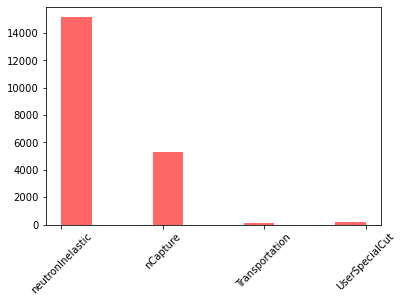

In [7]:
neutron_interactions = mother_particles.final_proc
plt.hist(neutron_interactions, alpha=0.6, color='r')
plt.xticks(rotation=45)

plt.show()

In [8]:
ninteractions_nInelastic = mother_particles[mother_particles.final_proc == "neutronInelastic"].event_id.nunique()
ninteractions_nCapture = mother_particles[mother_particles.final_proc == "nCapture"].event_id.nunique()
ninteractions_Transportation = mother_particles[mother_particles.final_proc == "Transportation"].event_id.nunique()
ninteractions_UserSpecialCut = mother_particles[mother_particles.final_proc == "UserSpecialCut"].event_id.nunique()

print(f'Inelastic scattering {100*ninteractions_nInelastic/ninteractions}%')
print(f'Neutron Capture {100*ninteractions_nCapture/ninteractions}%')
print(f'Transportation {100*ninteractions_Transportation/ninteractions}%')
print(f'"User Special Cut" {100*ninteractions_UserSpecialCut/ninteractions}%')

Inelastic scattering 72.77970011534025%
Neutron Capture 25.504613610149942%
Transportation 0.65840061514802%
"User Special Cut" 1.0572856593617839%


In [9]:
ninteractions_nInelastic

15144

At ~high energies, inelastic scattering is the dominant process. Checking in which isotopes it's the most dominant process:

In [10]:
n_inelscatt = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ].particle_name

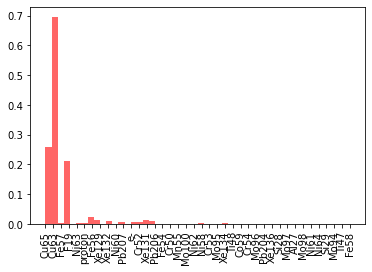

In [11]:
plt.hist(n_inelscatt, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

I'm going to check the deposited energy in the volumen when there's an inelastic scattering. To do so, I need to check which events are caused by neutronInelastic, and then check the total energy deposited by the hits information

In [12]:
non_neutronInelastic_events = mother_particles[~(mother_particles.final_proc == "neutronInelastic")].event_id.unique()

non_neutronInelastic_events

array([    1,     4,     6, ..., 20795, 20799, 20806], dtype=int32)

In [13]:
len(non_neutronInelastic_events)

5664

In [85]:
hits_2MeV = pd.read_hdf(h5file_highE, 'MC/hits')
hits_2MeV

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,-59.493660,100.112457,261.259430,45328.539062,0.000047,ACTIVE,40,0
1,0,-59.493660,100.112465,261.259430,45328.539062,0.000021,ACTIVE,70,0
2,0,-59.495838,100.113121,261.263214,45328.539062,0.000317,ACTIVE,69,0
3,0,-59.499557,100.114449,261.269867,45328.539062,0.003809,ACTIVE,69,1
4,0,-59.501431,100.114143,261.271606,45328.539062,0.000755,ACTIVE,69,2
...,...,...,...,...,...,...,...,...,...
1969885,20807,-15.786578,-112.746468,267.734528,28206.623047,0.002434,ACTIVE,219,12
1969886,20807,-15.777272,-112.748413,267.738464,28206.623047,0.001999,ACTIVE,219,13
1969887,20807,-15.782390,-112.749878,267.743073,28206.625000,0.002492,ACTIVE,219,14
1969888,20807,-15.783948,-112.748222,267.740295,28206.625000,0.002794,ACTIVE,219,15


In [86]:
detector_energy_2MeV = []
detector_x_2MeV = []
detector_y_2MeV = []
detector_z_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_2MeV[hits_2MeV.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    totalenergy = np.sum(et)
    totalx = np.sum(xt)
    totaly = np.sum(yt)
    totalz = np.sum(zt)
    if totalenergy != 0.0:
        detector_energy_2MeV.append(totalenergy)
        detector_x_2MeV.append(totalx)
        detector_y_2MeV.append(totaly)
        detector_z_2MeV.append(totalz)

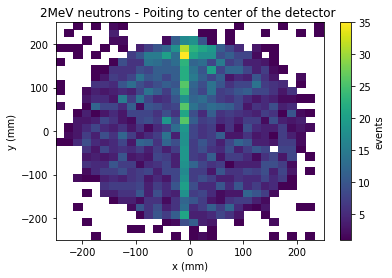

In [93]:
plt.hist2d(detector_x_2MeV, detector_y_2MeV, bins=(30, 30), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('2MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

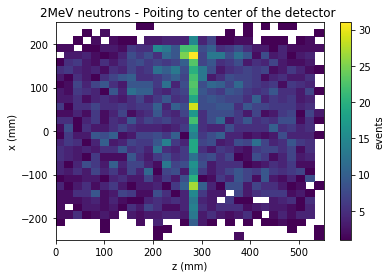

In [97]:
plt.hist2d(detector_z_2MeV, detector_y_2MeV, bins=(30, 30), range=((0, 550), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('2MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

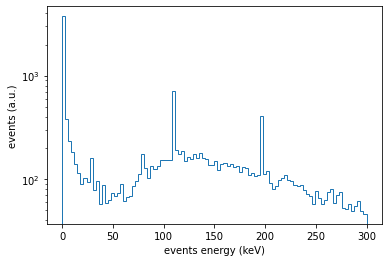

In [16]:
plt.hist(detector_energy_2MeV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [17]:
evt_neutronInelastic    = ~hits.event_id.isin(non_neutronInelastic_events) 


In [18]:
hits_neutronInelastic = hits[evt_neutronInelastic]

In [19]:
neutronInelastic_energy_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:neutronInelastic_energy_2MeV.append(totalenergy)

In [20]:
len(neutronInelastic_energy_2MeV)

15144

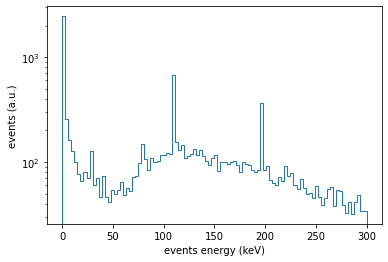

In [21]:
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [22]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

evt_nCapture    = ~hits.event_id.isin(non_nCapture_events) 

hits_nCapture = hits[evt_nCapture]

In [23]:
nCapture_energy_2MeV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_2MeV.append(totalenergy)

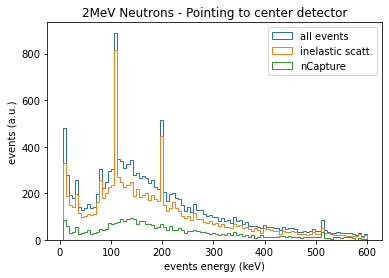

In [24]:
plt.hist(detector_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_2MeV, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

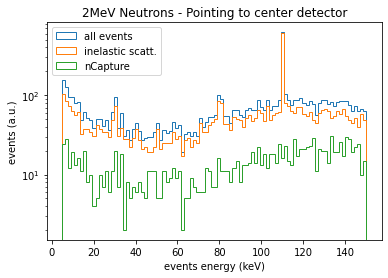

In [25]:
plt.hist(detector_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_2MeV, bins = 100, range=(5,150), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
plt.yscale('log')
plt.legend(loc=2);
plt.show()

In [26]:
daugther_particles_neutronInelastic = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ]
daugther_particles_neutronInelastic

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
30,0,3,Cu65,0,1,0.000000,259.086151,275.100006,2.870747,2.209799e-07,...,13.528273,-53.522171,21.902855,0.0,-0.0,0.0,0.029169,0.000085,neutronInelastic,RadioactiveDecayBase
577,2,3,Cu63,0,1,44.500275,298.414490,319.808594,3.405761,4.450028e+01,...,61.375023,-5.120599,19.676916,0.0,-0.0,0.0,0.035666,0.000093,neutronInelastic,RadioactiveDecayBase
582,3,7,Fe57,0,1,-27.479485,329.962219,213.105438,4.685744,-2.747949e+01,...,-27.584688,68.122978,-10.846050,-0.0,0.0,-0.0,0.052047,0.000067,neutronInelastic,RadioactiveDecayBase
1520,5,3,Cu63,0,1,-45.195869,-255.805679,464.478485,31.042959,-4.519587e+01,...,-13.584160,-24.203423,20.224968,-0.0,-0.0,0.0,0.010062,0.000049,neutronInelastic,RadioactiveDecayBase
1965,7,5,Cu63,0,1,161.143402,-220.637299,657.180969,43.875828,1.611434e+02,...,-24.080645,5.504298,36.322754,-0.0,0.0,0.0,0.016462,0.000063,neutronInelastic,RadioactiveDecayBase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505189,20802,5,Pb207,0,1,-934.754700,-551.370789,377.246002,511.247437,-9.347547e+02,...,-19.172602,-56.206360,-17.413902,-0.0,-0.0,-0.0,0.009935,0.000052,neutronInelastic,RadioactiveDecayBase
4505224,20803,3,Cu65,0,1,0.000000,306.988434,275.100006,0.417912,-1.617737e-07,...,-8.466142,-50.195477,38.148651,-0.0,-0.0,0.0,0.033462,0.000091,neutronInelastic,RadioactiveDecayBase
4505673,20804,3,Cu63,0,1,8.057755,299.143982,200.401382,5.132567,8.057753e+00,...,-60.235722,-34.380733,-48.705879,-0.0,-0.0,-0.0,0.061281,0.000121,neutronInelastic,RadioactiveDecayBase
4505925,20805,3,Cu65,0,1,-5.262041,253.778305,283.758698,3.277390,-5.262040e+00,...,34.634689,-34.860046,14.497308,0.0,-0.0,0.0,0.021706,0.000074,neutronInelastic,RadioactiveDecayBase


In [27]:
neutronInelastic_energy_Cu65, neutronInelastic_energy_Cu63, neutronInelastic_energy_Fe57 = [], [], []
neutronInelastic_energy_F19, neutronInelastic_energy_Ni63, neutronInelastic_energy_proton = [], [], []
neutronInelastic_energy_Fe56, neutronInelastic_energy_Xe129, neutronInelastic_energy_Xe132 = [], [], []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    part_int = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number].particle_name.unique()
    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:
        if part_int[0] == 'Cu65': neutronInelastic_energy_Cu65.append(totalenergy)
        elif part_int[0] == 'Cu63': neutronInelastic_energy_Cu63.append(totalenergy)
        elif part_int[0] == 'Fe57': neutronInelastic_energy_Fe57.append(totalenergy)
        elif part_int[0] == 'F19': neutronInelastic_energy_F19.append(totalenergy)
        elif part_int[0] == 'Ni63': neutronInelastic_energy_Ni63.append(totalenergy)
        elif part_int[0] == 'proton': neutronInelastic_energy_proton.append(totalenergy)
        elif part_int[0] == 'Fe56': neutronInelastic_energy_Fe56.append(totalenergy)
        elif part_int[0] == 'Xe129': neutronInelastic_energy_Xe129.append(totalenergy)
        elif part_int[0] == 'Xe132': neutronInelastic_energy_Xe132.append(totalenergy)
            

In [28]:
len(neutronInelastic_energy_Cu65)

3077

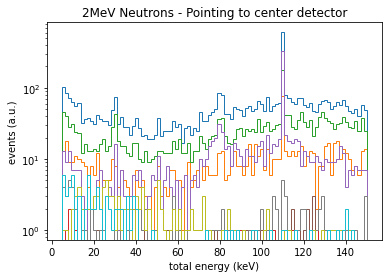

In [29]:
rangemin = 5
rangemax = 150
plt.hist(neutronInelastic_energy_2MeV, bins = 100, range=(rangemin,rangemax), histtype='step', label = "all inel. scatt.")
plt.hist(neutronInelastic_energy_Cu65, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Cu65")
plt.hist(neutronInelastic_energy_Cu63, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Cu63")
plt.hist(neutronInelastic_energy_Fe57, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe57")
plt.hist(neutronInelastic_energy_F19, bins = 100, range=(rangemin,rangemax), histtype='step', label = "F19")
plt.hist(neutronInelastic_energy_Ni63, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Ni63")
plt.hist(neutronInelastic_energy_proton, bins = 100, range=(rangemin,rangemax), histtype='step', label = "proton")
plt.hist(neutronInelastic_energy_Fe56, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe56")
plt.hist(neutronInelastic_energy_Xe129, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe129")
plt.hist(neutronInelastic_energy_Xe132, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe132")

plt.xlabel('total energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('2MeV Neutrons - Pointing to center detector')
#plt.legend(loc=2);
plt.yscale('log')
plt.show()

In [30]:
particles_evt = particles[particles.event_id == evt_number]
particles_evt_inel = particles_evt[particles_evt.creator_proc == 'neutronInelastic']
particles_evt_inel_atom = particles_evt_inel[(particles_evt_inel.particle_name != 'gamma') &
                                            (particles_evt_inel.particle_name != 'neutron')]

xt_atom = particles_evt_inel_atom.initial_x.values[0]
yt_atom = particles_evt_inel_atom.initial_y.values[0]
zt_atom = particles_evt_inel_atom.initial_z.values[0]
rt_atom = np.sqrt(xt_atom**2+yt_atom**2)

bx = np.array([xt_atom])
by = np.array([yt_atom])
bz = np.array([zt_atom])
br = np.array([rt_atom])

particles_evt_inel_gamma = particles_evt_inel[(particles_evt_inel.particle_name == 'gamma')]

xt_gamma = particles_evt_inel_gamma.final_x.values[0]
yt_gamma = particles_evt_inel_gamma.final_y.values[0]
zt_gamma = particles_evt_inel_gamma.final_z.values[0]

bx_g = np.array([xt_gamma])
by_g = np.array([yt_gamma])
bz_g = np.array([zt_gamma])

In [31]:
#particles_evt[particles_evt.mother_id == 2]
particles_evt

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
4506185,20807,1,neutron,1,0,0.000000,315.149994,275.100006,0.000000,0.000000,...,0.000000,-61.337276,0.000000,0.0,-0.0,0.0,2.000000,3.290000e+01,none,neutronInelastic
4506186,20807,4,gamma,0,1,0.000000,282.250000,275.100006,1.684643,21.313745,...,-0.288221,0.204682,-0.568764,0.0,-0.0,0.0,0.669670,3.047023e+01,neutronInelastic,phot
4506187,20807,14,e-,0,4,21.313745,288.466583,275.577820,1.786281,21.313745,...,0.002102,-0.004579,0.006022,-0.0,0.0,-0.0,0.000060,1.470291e-07,phot,msc
4506188,20807,13,e-,0,4,21.313745,288.466583,275.577820,1.786281,21.313745,...,-0.002398,0.002155,0.007180,-0.0,0.0,0.0,0.000061,1.473075e-07,phot,msc
4506189,20807,12,e-,0,4,21.313745,288.466583,275.577820,1.786281,21.313747,...,0.021190,-0.009778,0.016464,0.0,0.0,-0.0,0.000798,1.416712e-05,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506418,20807,22,proton,0,2,-225.172745,-23.949345,568.604980,223.601395,-225.171783,...,3.906389,-11.580331,-11.844956,0.0,-0.0,-0.0,0.154349,3.607696e-03,hadElastic,hIoni
4506419,20807,21,O16,0,2,146.899734,-212.204544,-6.838436,86.003143,146.899826,...,16.177885,-8.428277,-49.591080,0.0,-0.0,-0.0,0.093723,4.315610e-04,hadElastic,RadioactiveDecayBase
4506420,20807,20,proton,0,2,238.940140,32.940483,29.383966,47.299686,238.938965,...,-9.521747,1.625977,17.439203,0.0,-0.0,0.0,0.211766,2.777059e-03,hadElastic,hIoni
4506421,20807,19,C12,0,2,241.709656,35.816582,27.982859,46.935780,241.710129,...,43.425655,12.436434,19.527212,0.0,0.0,0.0,0.108357,5.668762e-04,hadElastic,RadioactiveDecayBase


In [119]:
evt_hits = hits_2MeV[hits_2MeV.event_id == evt_number]
evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

xt = evt_hits.x
yt = evt_hits.y
zt = evt_hits.z
rt = np.sqrt(xt**2+yt**2)
et = evt_hits.energy*1000

In [120]:
#particles_evt[particles_evt.particle_id == 23]
evt_hits

,event_id,x,y,z,time,energy,label,particle_id,hit_id
1752651,18488,142.187073,-33.300858,260.642639,4402.097168,0.000314,ACTIVE,51,0
1752652,18488,142.187149,-33.300880,260.642578,4402.097168,0.000021,ACTIVE,95,0
1752653,18488,142.187119,-33.300869,260.642639,4402.097168,0.000048,ACTIVE,94,0
1752654,18488,142.187088,-33.300941,260.642578,4402.097168,0.000023,ACTIVE,93,0
1752655,18488,142.187103,-33.300842,260.642639,4402.097168,0.000046,ACTIVE,92,0
...,...,...,...,...,...,...,...,...,...
1752718,18488,140.791656,-34.961353,262.235657,4402.111328,0.002594,ACTIVE,98,2
1752719,18488,140.791946,-34.961308,262.235870,4402.111328,0.000672,ACTIVE,98,3
1752720,18488,140.797119,-34.962620,262.238068,4402.110840,0.000036,ACTIVE,97,0
1752721,18488,140.796036,-34.965725,262.237518,4402.110840,0.001440,ACTIVE,97,1


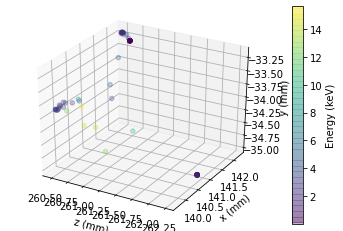

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter(zt, xt, yt, c=et, alpha=0.3, cmap='viridis')
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy (keV)')

ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')

plt.show()

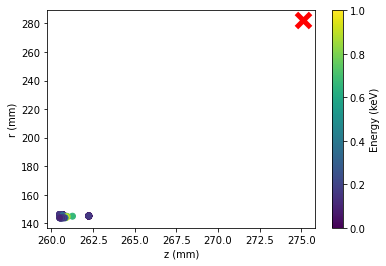

In [132]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(zt, rt, cmap='viridis', c=et)
plt.scatter(bz, br, marker='x', s=200, linewidth=5, color='red')
#plt.scatter(bx_g, by_g, marker='x', s=200, linewidth=5, color='green')
plt.xlabel('z (mm)')
plt.ylabel('r (mm)')

cb = plt.colorbar(label='Energy (keV)')
plt.show()

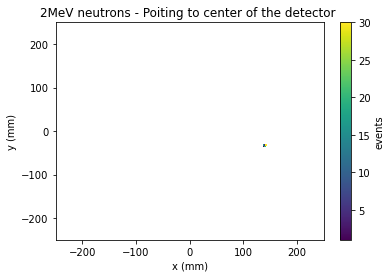

In [127]:
plt.hist2d(xt, yt, bins=(250, 250), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('2MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

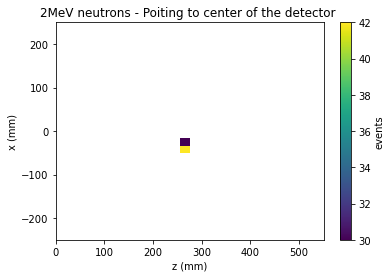

In [123]:
plt.hist2d(zt, yt, bins=(30, 30), range=((0, 550), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('2MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

## LOW ENERGY - 0.5MeV neutrons
### Checking different processes from neutron interaction

In [36]:
particles = pd.read_hdf(h5file_lowE, 'MC/particles')
mother_particles = particles[particles.primary == 1]
daughter_particles = particles[particles.mother_id == 1]

In [37]:
mother_particles

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
0,0,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-18.618095,...,0.0,-30.656408,0.0,0.0,0.0,-0.0,0.5,261.403229,none,nCapture
212,1,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-10.941144,...,0.0,-30.656408,0.0,-0.0,-0.0,0.0,0.5,420.634247,none,nCapture
402,2,1,neutron,1,0,0.0,315.149994,275.100006,0.0,0.000000,...,0.0,-30.656408,0.0,0.0,-0.0,0.0,0.5,102.256035,none,neutronInelastic
741,3,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-105.033897,...,0.0,-30.656408,0.0,-0.0,0.0,-0.0,0.5,920.004639,none,nCapture
782,4,1,neutron,1,0,0.0,315.149994,275.100006,0.0,138.450821,...,0.0,-30.656408,0.0,-0.0,-0.0,-0.0,0.5,841.077576,none,nCapture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064030,18484,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-45.696655,...,0.0,-30.656408,0.0,0.0,-0.0,0.0,0.5,595.588623,none,nCapture
4064346,18485,1,neutron,1,0,0.0,315.149994,275.100006,0.0,103.493492,...,0.0,-30.656408,0.0,-0.0,0.0,-0.0,0.5,284.694336,none,neutronInelastic
4064516,18486,1,neutron,1,0,0.0,315.149994,275.100006,0.0,100.635071,...,0.0,-30.656408,0.0,-0.0,-0.0,0.0,0.5,1329.614258,none,nCapture
4064937,18487,1,neutron,1,0,0.0,315.149994,275.100006,0.0,-131.341873,...,0.0,-30.656408,0.0,-0.0,-0.0,0.0,0.5,565.878479,none,nCapture


In [38]:
configuration = pd.read_hdf(h5file_lowE, 'MC/configuration')

In [39]:
# Total amount of events 
ninteractions = mother_particles.event_id.nunique()
print(f'Number of events interacting {100*ninteractions/ngenerated}%')

Number of events interacting 18.489%


Neutron interactions in the volume

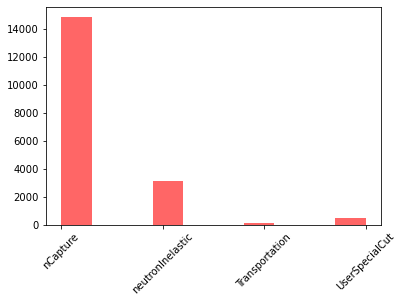

In [40]:
neutron_interactions = mother_particles.final_proc
plt.hist(neutron_interactions, alpha=0.6, color='r')
plt.xticks(rotation=45)

plt.show()

In this case we're dominated by neutron capture processes. 

In [41]:
ninteractions_nInelastic = mother_particles[mother_particles.final_proc == "neutronInelastic"].event_id.nunique()
ninteractions_nCapture = mother_particles[mother_particles.final_proc == "nCapture"].event_id.nunique()
ninteractions_Transportation = mother_particles[mother_particles.final_proc == "Transportation"].event_id.nunique()
ninteractions_UserSpecialCut = mother_particles[mother_particles.final_proc == "UserSpecialCut"].event_id.nunique()

print(f'Inelastic scattering {100*ninteractions_nInelastic/ninteractions}%')
print(f'Neutron Capture {100*ninteractions_nCapture/ninteractions}%')
print(f'Transportation {100*ninteractions_Transportation/ninteractions}%')
print(f'"User Special Cut" {100*ninteractions_UserSpecialCut/ninteractions}%')

Inelastic scattering 16.999296879225486%
Neutron Capture 80.12331656660717%
Transportation 0.5138190275298826%
"User Special Cut" 2.36356752663746%


Looking in detail into neutron inelastic processes

In [42]:
n_inelscatt = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ].particle_name

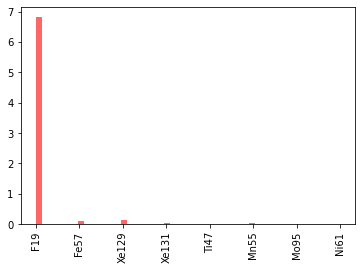

In [43]:
plt.hist(n_inelscatt, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

I'm going to check in this case the deposited energy in the volume due to neutron inelastic processes

In [44]:
non_neutronInelastic_events = mother_particles[~(mother_particles.final_proc == "neutronInelastic")].event_id.unique()

non_neutronInelastic_events

array([    0,     1,     3, ..., 18484, 18486, 18487], dtype=int32)

In [98]:
hits_500keV = pd.read_hdf(h5file_lowE, 'MC/hits')
hits_500keV

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,-54.255474,78.356903,172.197235,28939.830078,0.000319,ACTIVE,104,0
1,0,-54.255394,78.356827,172.197220,28939.830078,0.000032,ACTIVE,127,0
2,0,-54.255463,78.356888,172.197250,28939.830078,0.000023,ACTIVE,126,0
3,0,-54.255432,78.356812,172.197266,28939.830078,0.000021,ACTIVE,125,0
4,0,-54.255463,78.356857,172.197235,28939.830078,0.000023,ACTIVE,124,0
...,...,...,...,...,...,...,...,...,...
1859811,18488,-94.191132,133.625290,41.764889,12500.358398,0.000509,ACTIVE,123,2
1859812,18488,-94.199425,133.631882,41.768810,12500.359375,0.003310,ACTIVE,123,3
1859813,18488,-94.202354,133.630081,41.773647,12500.359375,0.002036,ACTIVE,123,4
1859814,18488,-94.201912,133.628387,41.770920,12500.359375,0.003217,ACTIVE,123,5


In [46]:
evt_neutronInelastic    = ~hits.event_id.isin(non_neutronInelastic_events) 

hits_neutronInelastic = hits[evt_neutronInelastic]

In [47]:
neutronInelastic_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:neutronInelastic_energy_500keV.append(totalenergy)

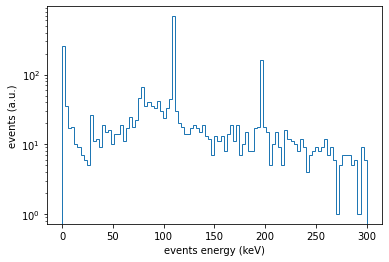

In [48]:
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(0,300), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.yscale('log')
plt.show()

In [100]:
detector_energy_500keV = []
detector_x_500keV = []
detector_y_500keV = []
detector_z_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_500keV[hits_500keV.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    totalenergy = np.sum(et)
    totalx = np.sum(xt)
    totaly = np.sum(yt)
    totalz = np.sum(zt)
    if totalenergy != 0.0:
        detector_energy_500keV.append(totalenergy)
        detector_x_500keV.append(totalx)
        detector_y_500keV.append(totaly)
        detector_z_500keV.append(totalz)

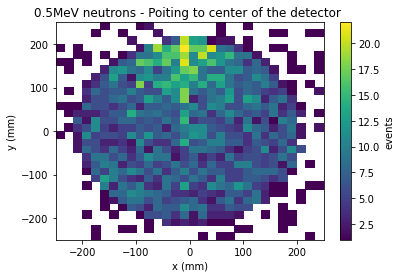

In [142]:
plt.hist2d(detector_x_500keV, detector_y_500keV, bins=(30, 30), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('0.5MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

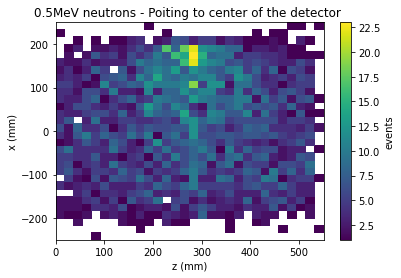

In [139]:
plt.hist2d(detector_z_500keV, detector_y_500keV, bins=(30, 30), range=((0, 550), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('0.5MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

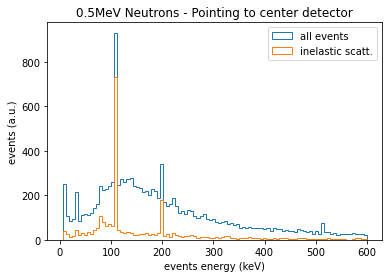

In [50]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

In [51]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

evt_nCapture    = ~hits.event_id.isin(non_nCapture_events) 

hits_nCapture = hits[evt_nCapture]

In [52]:
nCapture_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_500keV.append(totalenergy)

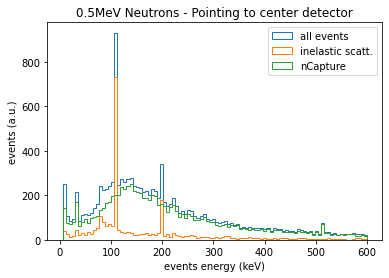

In [53]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_500keV, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

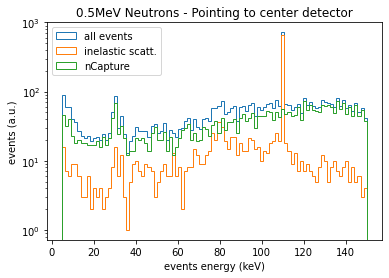

In [54]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'all events')
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'inelastic scatt.')
plt.hist(nCapture_energy_500keV, bins = 100, range=(5,150), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('0.5MeV Neutrons - Pointing to center detector')
plt.yscale('log')
plt.legend(loc=2);
plt.show()

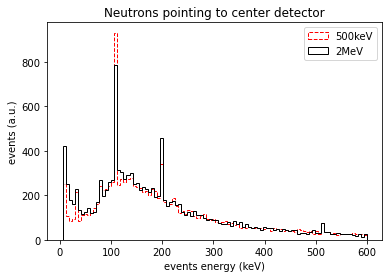

In [115]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,600), histtype='step', color = 'red', label = '500keV', linestyle='dashed')
plt.hist(detector_energy_2MeV, bins = 100, range=(5,600), histtype='step', color = 'black', label = '2MeV')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('Neutrons pointing to center detector')
#plt.yscale('log')
plt.legend(loc=1);
plt.show()

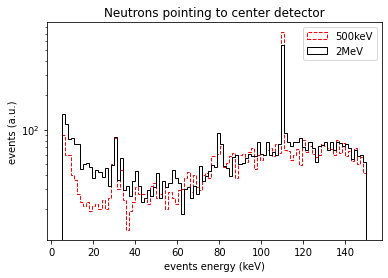

In [117]:
plt.hist(detector_energy_500keV, bins = 100, range=(5,150), histtype='step', color = 'red', label = '500keV', linestyle='dashed')
plt.hist(detector_energy_2MeV, bins = 100, range=(5,150), histtype='step', color = 'black', label = '2MeV')
#plt.hist(nCapture_energy, bins = 100, range=(5,600), histtype='step', label = 'nCapture')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
plt.title('Neutrons pointing to center detector')
plt.yscale('log')
plt.legend(loc=1);
plt.show()

In [118]:
npz_file = '/Users/halmamol/NEXT/NBarrays/neutrons_center'
np.savez(npz_file, detector_energy_500keV=detector_energy_500keV, detector_energy_2MeV=detector_energy_2MeV)


In [55]:
daugther_particles_neutronInelastic = daughter_particles[(daughter_particles.creator_proc == "neutronInelastic") 
                   & (daughter_particles.particle_name != "gamma") 
                   & (daughter_particles.particle_name != "neutron") ]
daugther_particles_neutronInelastic

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
416,2,3,F19,0,1,0.000000,212.893967,275.100006,10.459521,-0.000057,...,-21.269098,-32.175163,-5.981885,-0.0,-0.0,-0.0,0.043053,0.000216,neutronInelastic,RadioactiveDecayBase
1080,7,4,F19,0,1,-83.723038,193.354614,223.477905,50.691875,-83.723038,...,-1.413280,-28.294439,-14.424304,-0.0,-0.0,-0.0,0.028561,0.000168,neutronInelastic,RadioactiveDecayBase
1516,11,3,F19,0,1,-36.198112,213.934341,196.086929,32.679359,-36.198044,...,24.466085,-30.302233,-12.084841,0.0,-0.0,-0.0,0.046994,0.000229,neutronInelastic,RadioactiveDecayBase
4254,21,4,F19,0,1,-66.387711,204.141998,358.592438,18.735006,-66.387711,...,4.925800,1.073548,-11.293951,0.0,0.0,-0.0,0.004323,0.000063,neutronInelastic,RadioactiveDecayBase
4711,24,3,F19,0,1,3.187058,215.874451,264.683960,18.848049,3.187076,...,11.587686,-22.087063,12.097696,0.0,-0.0,0.0,0.021718,0.000144,neutronInelastic,RadioactiveDecayBase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063031,18480,4,F19,0,1,-160.824875,134.369858,492.424194,42.623878,-160.824875,...,2.023772,-13.618791,7.606858,0.0,-0.0,0.0,0.006993,0.000080,neutronInelastic,RadioactiveDecayBase
4063525,18482,3,F19,0,1,193.399307,-79.611160,321.047333,46.308868,193.399323,...,6.364082,-29.746172,-16.574177,0.0,-0.0,-0.0,0.033914,0.000186,neutronInelastic,RadioactiveDecayBase
4063707,18483,3,F19,0,1,-11.510382,210.561646,335.169037,41.060856,-11.510382,...,-0.614070,-18.495049,-4.560814,-0.0,-0.0,-0.0,0.010266,0.000098,neutronInelastic,RadioactiveDecayBase
4064375,18485,3,F19,0,1,103.493492,184.259155,263.134796,35.035942,103.493454,...,-21.495489,17.960176,-12.227793,-0.0,0.0,-0.0,0.026400,0.000160,neutronInelastic,RadioactiveDecayBase


In [56]:
neutronInelastic_energy_Fe57 = []
neutronInelastic_energy_F19 = []
neutronInelastic_energy_Xe129, neutronInelastic_energy_Xe132 = [], []

neutronInelastic_x_Fe57 = []
neutronInelastic_x_F19 = []
neutronInelastic_x_Xe129, neutronInelastic_x_Xe132 = [], []

neutronInelastic_y_Fe57 = []
neutronInelastic_y_F19 = []
neutronInelastic_y_Xe129, neutronInelastic_y_Xe132 = [], []

for evt_number in range(0,ninteractions):
    
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    part_int = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number].particle_name.unique()
    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    posx_avg = np.sum(xt)/np.size(xt)
    posy_avg = np.sum(yt)/np.size(yt)
    if totalenergy != 0.0:
        if part_int[0] == 'Fe57': 
            neutronInelastic_energy_Fe57.append(totalenergy) 
            neutronInelastic_x_Fe57.append(posx_avg)
            neutronInelastic_y_Fe57.append(posy_avg)
        elif part_int[0] == 'F19': 
            neutronInelastic_energy_F19.append(totalenergy)
            neutronInelastic_x_F19.append(posx_avg)
            neutronInelastic_y_F19.append(posy_avg)
        elif part_int[0] == 'Xe129': 
            neutronInelastic_energy_Xe129.append(totalenergy)
            neutronInelastic_x_Xe129.append(posx_avg)
            neutronInelastic_y_Xe129.append(posy_avg)
        elif part_int[0] == 'Xe132': 
            neutronInelastic_energy_Xe132.append(totalenergy)
            neutronInelastic_x_Xe132.append(posx_avg)
            neutronInelastic_y_Xe132.append(posy_avg)

<ipython-input-56-7f895fbfa09e>:24: RuntimeWarning: invalid value encountered in true_divide
  posx_avg = np.sum(xt)/np.size(xt)
<ipython-input-56-7f895fbfa09e>:25: RuntimeWarning: invalid value encountered in true_divide
  posy_avg = np.sum(yt)/np.size(yt)


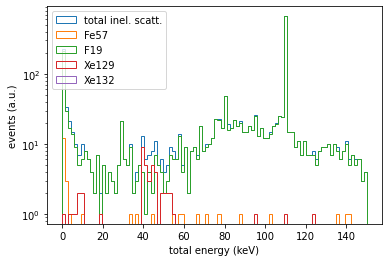

In [57]:
rangemin = 0
rangemax = 150
plt.hist(neutronInelastic_energy_500keV, bins = 100, range=(rangemin,rangemax), histtype='step', label = "total inel. scatt.")
plt.hist(neutronInelastic_energy_Fe57, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Fe57")
plt.hist(neutronInelastic_energy_F19, bins = 100, range=(rangemin,rangemax), histtype='step', label = "F19")
plt.hist(neutronInelastic_energy_Xe129, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe129")
plt.hist(neutronInelastic_energy_Xe132, bins = 100, range=(rangemin,rangemax), histtype='step', label = "Xe132")

plt.xlabel('total energy (keV)')
plt.ylabel('events (a.u.)')
plt.legend(loc=2);
plt.yscale('log')
plt.show()

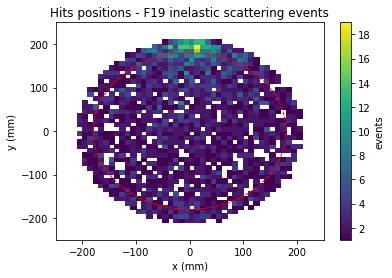

In [152]:
fig, ax = plt.subplots()
plt.hist2d(neutronInelastic_x_F19, neutronInelastic_y_F19, bins=(50, 50), range=((-250, 250), (-250, 250)), cmap='viridis', cmin=0.001)

circle1 = plt.Circle((0, 0), 180, edgecolor = 'red', fill = False ,linestyle = '--')
ax.add_artist(circle1)
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Hits positions - F19 inelastic scattering events')
plt.show()

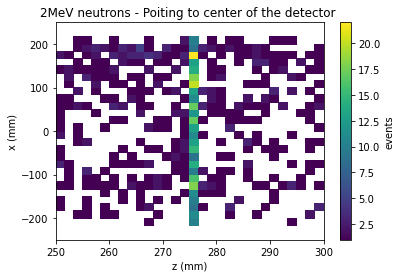

In [96]:
plt.hist2d(detector_z_2MeV, detector_y_2MeV, bins=(30, 30), range=((250, 300), (-250, 250)), cmap='viridis', cmin=0.001)
#range=((-50, 50), (-50, 50)),
plt.xlabel('z (mm)')
plt.ylabel('x (mm)')
plt.title('2MeV neutrons - Poiting to center of the detector ')
#plt.xlim((0.0,1.5))
plt.colorbar(label='events')

In [59]:
non_nCapture_events = mother_particles[~(mother_particles.final_proc == "nCapture")].event_id.unique()

non_nCapture_events

array([    2,     7,    11, ..., 18483, 18485, 18488], dtype=int32)

In [60]:
evt_nCapture    = ~hits.event_id.isin(non_nCapture_events) 

hits_nCapture = hits[evt_nCapture]

In [61]:
hits_nCapture

,event_id,x,y,z,time,energy,label,particle_id,hit_id
0,0,-54.255474,78.356903,172.197235,28939.830078,0.000319,ACTIVE,104,0
1,0,-54.255394,78.356827,172.197220,28939.830078,0.000032,ACTIVE,127,0
2,0,-54.255463,78.356888,172.197250,28939.830078,0.000023,ACTIVE,126,0
3,0,-54.255432,78.356812,172.197266,28939.830078,0.000021,ACTIVE,125,0
4,0,-54.255463,78.356857,172.197235,28939.830078,0.000023,ACTIVE,124,0
...,...,...,...,...,...,...,...,...,...
1859794,18487,-74.784386,-170.125458,501.621704,126758.070312,0.000459,ACTIVE,97,22
1859795,18487,-74.773720,-170.124954,501.622528,126758.070312,0.001936,ACTIVE,97,23
1859796,18487,-74.770325,-170.131149,501.625092,126758.070312,0.001797,ACTIVE,97,24
1859797,18487,-74.769379,-170.126434,501.625885,126758.070312,0.003856,ACTIVE,97,25


In [62]:
nCapture_energy_500keV = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits_nCapture[hits_nCapture.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:nCapture_energy_500keV.append(totalenergy)

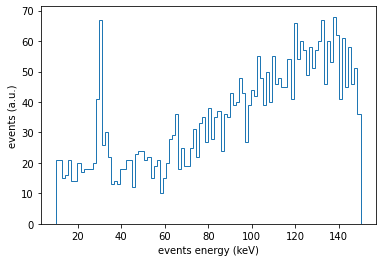

In [63]:
plt.hist(nCapture_energy_500keV, bins = 100, range=(10,150), histtype='step')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale('log')
plt.show()

In [64]:
n_Capture = daughter_particles[(daughter_particles.creator_proc == "nCapture") 
                   & (daughter_particles.particle_name != "gamma")].particle_name

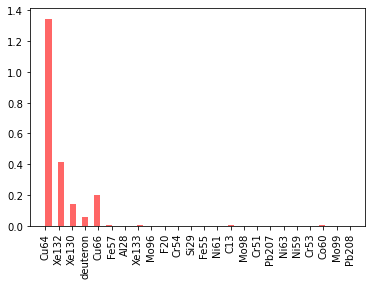

In [65]:
plt.hist(n_Capture, density=True, alpha=0.6, bins = 50, color='r')
plt.xticks(rotation=90)

plt.show()

In [66]:
particles_evt = particles[particles.event_id == 3]

In [67]:
R_clusterA = 50
clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
for evt_number in range(0,ninteractions):
#evt_number = 103   
    clusterA_energy = 0
    clusterB_energy = 0
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']
    evt_particles_nInelastic = daugther_particles_neutronInelastic[daugther_particles_neutronInelastic.event_id == evt_number]

    part_int = evt_particles_nInelastic.particle_name.unique()

    xt_atom = evt_particles_nInelastic.initial_x.unique()
    yt_atom = evt_particles_nInelastic.initial_y.unique()
    zt_atom = evt_particles_nInelastic.initial_z.unique()
    rt_atom = np.sqrt(xt_atom*xt_atom + yt_atom*yt_atom)

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)

    totalenergy = np.sum(et)

    for i in range(0, len(et)):
        if((np.abs(rt.values[i]-rt_atom) < R_clusterA) & (np.abs(zt.values[i]-zt_atom) < R_clusterA)) :
            clusterA_energy = clusterA_energy + et.values[i]
            print('Event valid')
        else:
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
    
    if((clusterA_energy != 0) * (clusterB_energy != 0)):
        clusterA_e.append(clusterA_energy)
        clusterB_e.append(clusterB_energy)
        clusterA_x.append(xt_atom)
        clusterA_y.append(yt_atom)
        clusterA_z.append(zt_atom)
        clusterB_x.append(np.sum(clusterB_posx)/np.size(clusterB_posx))
        clusterB_y.append(np.sum(clusterB_posy)/np.size(clusterB_posy))
        clusterB_z.append(np.sum(clusterB_posz)/np.size(clusterB_posz))
        
    


Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Event valid
Even

In [68]:
dCluster = []
for i in range(0, len(clusterA_e)):
    dist = np.sqrt((clusterA_x[i]-clusterB_x[i])**2
                            +(clusterA_y[i]-clusterB_y[i])**2
                            +(clusterA_z[i]-clusterB_z[i])**2)
    dCluster.append(dist[0])
len(dCluster)

180

No handles with labels found to put in legend.


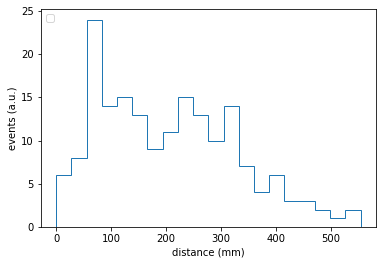

In [69]:
plt.hist(dCluster, bins = 20, histtype='step')

plt.xlabel('distance (mm)')
plt.ylabel('events (a.u.)')
plt.legend(loc=2);
plt.show()

In [70]:
R_clusterA = 10
dCluster = []
ClusterA_e_total, ClusterB_e_total = [], []
#ninteractions
notenoughenergy = 0
only1cluster = 0
for evt_number in range(0,20):
#evt_number = 7   
    clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
    clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
    clusterA_energy = 0
    clusterB_energy = 0
    clusterA_posx, clusterA_posy, clusterA_posz = [], [], []
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    #evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = hits[hits.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)
    if(np.sum(et) < 1):
        notenoughenergy +=1
        print('Energy below threshold')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(0)
        ClusterB_e_total.append(0)
        continue
    minv = 1
    #print(len(et))
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-rt.values[i-1]) < R_clusterA) & (np.abs(zt.values[i]-zt.values[i-1]) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster A')  
            clusterA_energy = clusterA_energy + et.values[i]
            clusterA_posx.append(xt.values[i])
            clusterA_posy.append(yt.values[i])
            clusterA_posz.append(zt.values[i])
        else:
            minv = i
            #print('Cluster A defined')
            break
    if(minv != minv):
        only1cluster += 1
        print('Only 1 Cluster')
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        print(f'Energy {clusterA_energy}')
        print(f'Total energy of event {np.sum(et)}')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(0)
        continue
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-rt.values[i-1]) < R_clusterA) & (np.abs(zt.values[i]-zt.values[i-1]) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster B')
            print({i})
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
        elif(i != minv):
            minv = i
            #print('Cluster B defined')
            break
    if(clusterA_energy == 0):
        print('Only 1 Cluster')
        print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        print(f'Energy {clusterB_energy}')
        print(f'Total energy of event {np.sum(et)}')
        print('-------')
        dCluster.append(0)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(0)
    else:
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        dist = np.sqrt((clusterA_x-clusterB_x)**2
                                    +(clusterA_y-clusterB_y)**2
                                    +(clusterA_z-clusterB_z)**2)
        print('Two Clusters')
        print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        print(f'Energy {clusterA_energy}')
        print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        print(f'Energy {clusterB_energy}')
        print(f'Distance between clusters {dist}')
        print(f'Total energy of event {np.sum(et)}')
        print(f'Total energy both clusters {clusterA_energy+clusterB_energy}')
        print('-------')

        dCluster.append(dist)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(clusterB_energy)


{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
Two Clusters
Cluster A (x,y,z)=(-54.255775451660156,78.3568115234375,172.1969757080078)
Energy 4.785220050252974
Cluster B (x,y,z)=(-70.23855590820312,75.52507781982422,183.13662719726562)
Energy 29.194980362430215
Distance between clusters 19.574063492199365
Total energy of event 123.3186264038086
Total energy both clusters 33.98020041268319
-------
{2}
{3}
{4}
{5}
{6}
{7}
{8}
{9}
{10}
{11}
{12}
{13}
{14}
{15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{23}
{24}
{25}
{26}
{27}
{28}
{29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{39}
{40}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{49}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59}
{60}
{61}
{62}
{63}
{64}
{65}
{66}
{67}
{68}
{69}
{70}
{71}
{72}
{73}
{74}
{75}
{76}
{77}
{78}
{79}
{80}
{81}
{82}
{83}
{84}
{85}
{86}
{87}
{88}
{89}
{90}
{91}
{92}
{93}
{94}
{95}
{96}
{97}
{98}
{99}
{100}
{101}
{102}
{103}
{104}
{105}
{106

In [71]:
R_clusterA = 20
dCluster = []
ClusterA_e_total, ClusterB_e_total, ClusterC_e_total = [], [], []
#ninteractions
nothreshold = 0
nothreshold_energy = []
only1cluster = 0
only1cluster_energy = []
twocluster = 0
twocluster_energy = []
morethan2cluster = 0
morethan2cluster_energy = []


for evt_number in range(0,ninteractions):
#evt_number = 7   
    clusterA_e, clusterA_x, clusterA_y, clusterA_z = [],[],[],[]
    clusterB_e, clusterB_x, clusterB_y, clusterB_z = [],[],[],[]
    clusterC_e, clusterC_x, clusterC_y, clusterC_z = [],[],[],[]
    clusterA_energy = 0
    clusterB_energy = 0
    clusterC_energy = 0
    clusterA_posx, clusterA_posy, clusterA_posz = [], [], []
    clusterB_posx, clusterB_posy, clusterB_posz = [], [], []
    clusterC_posx, clusterC_posy, clusterC_posz = [], [], []
    #evt_hits = hits_neutronInelastic[hits_neutronInelastic.event_id == evt_number]
    evt_hits = hits[hits.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    xt = evt_hits.x
    yt = evt_hits.y
    zt = evt_hits.z
    et = evt_hits.energy*1000

    rt = np.sqrt(xt*xt + yt+yt)
    if(np.sum(et) < 1):
        nothreshold +=1
        nothreshold_energy.append(np.sum(et))
        print('Energy below threshold')
        print('-------')
        continue
    minv = 1
    riniA = rt.values[0]
    ziniA = zt.values[0]
    clusterA_energy = et.values[0]
    riniB = 0
    ziniB = 0
    riniC = 0
    ziniC = 0
    #print(len(et))
    for i in range(minv, len(et)):
        if((np.abs(rt.values[i]-riniA) < R_clusterA) & (np.abs(zt.values[i]-ziniA) < R_clusterA)) :
            #print(f'Hit {i} valid - Cluster A')  
            clusterA_energy = clusterA_energy + et.values[i]
            clusterA_posx.append(xt.values[i])
            clusterA_posy.append(yt.values[i])
            clusterA_posz.append(zt.values[i])
        elif((riniB == 0) & (ziniB == 0)):
            riniB = rt.values[i]
            ziniB = zt.values[i]
            clusterB_energy = et.values[0]
            continue
        elif((np.abs(rt.values[i]-riniB) < R_clusterA) & (np.abs(zt.values[i]-ziniB) < R_clusterA)) :
            clusterB_energy = clusterB_energy + et.values[i]
            clusterB_posx.append(xt.values[i])
            clusterB_posy.append(yt.values[i])
            clusterB_posz.append(zt.values[i])
        elif((riniC == 0) & (ziniC == 0)):
            riniC = rt.values[i]
            ziniC = zt.values[i]
            clusterC_energy = et.values[0]
            continue   
        elif((np.abs(rt.values[i]-riniC) < R_clusterA) & (np.abs(zt.values[i]-ziniC) < R_clusterA)) :
            clusterC_energy = clusterC_energy + et.values[i]
            clusterC_posx.append(xt.values[i])
            clusterC_posy.append(yt.values[i])
            clusterC_posz.append(zt.values[i])
            
    if(clusterB_energy == 0):
        only1cluster += 1
        only1cluster_energy.append(np.sum(et))
        print('One Cluster')
        print('-------')
    elif(clusterC_energy == 0):
        twocluster += 1
        twocluster_energy.append(np.sum(et))
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)

        clusterC_x = np.mean(clusterC_posx)
        clusterC_y = np.mean(clusterC_posy)
        clusterC_r = np.sqrt(clusterC_x**2+clusterC_y**2)
        clusterC_z = np.mean(clusterC_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        dist = np.sqrt((clusterA_x-clusterB_x)**2
                                    +(clusterA_y-clusterB_y)**2
                                    +(clusterA_z-clusterB_z)**2)
        print('Two Clusters')
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        #print(f'Energy {clusterA_energy}')
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')
        #print(f'Energy {clusterB_energy}')
        #print(f'Cluster C (x,y,z)=({clusterC_x},{clusterC_y},{clusterC_z})')
        #print(f'Energy {clusterC_energy}')
        #print(f'Distance between clusters {dist}')
        #print(f'Total energy of event {np.sum(et)}')
        #print(f'Total energy both clusters {clusterA_energy+clusterB_energy}')
        print('-------')
        dCluster.append(dist)
        ClusterA_e_total.append(clusterA_energy)
        ClusterB_e_total.append(clusterB_energy)
    elif(clusterC_energy+clusterB_energy > 0.9*np.sum(et)):
        twocluster += 1
        twocluster_energy.append(np.sum(et))
        clusterA_x = np.mean(clusterA_posx)
        clusterA_y = np.mean(clusterA_posy)
        clusterA_r = np.sqrt(clusterA_x**2+clusterA_y**2)
        clusterA_z = np.mean(clusterA_posz)
        #print(f'Cluster A (x,y,z)=({clusterA_x},{clusterA_y},{clusterA_z})')
        clusterB_x = np.mean(clusterB_posx)
        clusterB_y = np.mean(clusterB_posy)
        clusterB_r = np.sqrt(clusterB_x**2+clusterB_y**2)
        clusterB_z = np.mean(clusterB_posz)

        clusterC_x = np.mean(clusterC_posx)
        clusterC_y = np.mean(clusterC_posy)
        clusterC_r = np.sqrt(clusterC_x**2+clusterC_y**2)
        clusterC_z = np.mean(clusterC_posz)
        #print(f'Cluster B (x,y,z)=({clusterB_x},{clusterB_y},{clusterB_z})')

        print('Two cluster')
        print('-------')
        dist = np.sqrt((clusterC_x-clusterB_x)**2
                                    +(clusterC_y-clusterB_y)**2
                                    +(clusterC_z-clusterB_z)**2)
        dCluster.append(dist)
        ClusterA_e_total.append(clusterB_energy)
        ClusterB_e_total.append(clusterC_energy)
    else:
        morethan2cluster += 1
        morethan2cluster_energy.append(np.sum(et))
        print('More than 2 Cluster')
        print('-------')

print('Total amount of events 20')
print(f'- Not enough energy = {nothreshold}')
print(f'- Only one cluster = {only1cluster}')
print(f'- Two cluster = {twocluster}')
print(f'- More than two cluster = {morethan2cluster}')


One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Two cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------


/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------


/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below thre

Two cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below th

Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More t

Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
----

Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Clu

More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
------

More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below thre

More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2

Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two C

Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
One Cluster
-------
More than 2 Cluster
-------

Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
--

One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
One Cluster


Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 

More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-----

More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
Two cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
En

Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------

More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-----

One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy 

One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cl

Two Clusters
-------
Two cluster
-------
One Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Cluster

Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
--

More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below thres

More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-----

More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------

Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-----

Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below thre

One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below thres

More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
----

Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Clu

More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster


Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two cluster
-------
Energy below threshold
-------
Energy b

More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters

Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Two cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-----

Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
O

Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster


More than 2 Cluster
-------
Energy below threshold
-------
Two cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cl

Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Two cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Ene

Two Clusters
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two

More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
---

More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below th

More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------

More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cl

More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than

More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Cluster

Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
M

More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
Two Cluste

More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Energy below threshol

One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------


More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two cluster
-------
One Cluster
-------
Energy below th

More than 2 Cluster
-------
Two cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Two cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
--

One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 

One Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
Two Clusters
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Two Clusters
-------
Two Clusters
-------
Two Clusters
-------
Two cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-----

Energy below threshold
-------
One Cluster
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two cluster
-------
More than 2 Cluster
-------
Energy below threshold
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
Energy below threshold
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
One Cluster
-------
Energy below threshold
-------
One Cluster
-------
One Cluster
-------
More than 2 Cluster
-------
One Cluster
-------
Two Clusters
-------
Energy below threshold
-------
Energy below threshold
-------
More than 2 Cluster
-------
Two Clusters
-------
More than 2 Cluster
-------
Two Clusters
-------
One Cluster
-------
More than 2 Cluster
-------
More than 2 Clus

In [72]:
print(f'- Number of initial events {ninteractions}')
print(f'- Not enough energy = {nothreshold}')
print(f'- Only one cluster = {only1cluster}')
print(f'- Two cluster = {twocluster}')
print(f'- More than two cluster = {morethan2cluster}')

- Number of initial events 18489
- Not enough energy = 3603
- Only one cluster = 6606
- Two cluster = 4151
- More than two cluster = 4129


In [73]:
hits_energy = []
for evt_number in range(0,ninteractions):
    
    evt_hits = hits[hits.event_id == evt_number]
    evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

    et = evt_hits.energy*1000
    totalenergy = np.sum(et)
    if totalenergy != 0.0:hits_energy.append(totalenergy)

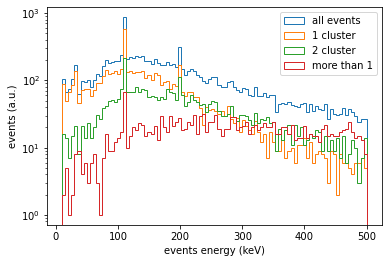

In [74]:
plt.hist(hits_energy, bins = 100, range=(10,500), histtype='step', label = 'all events')
plt.hist(only1cluster_energy, bins = 100, range=(10,500), histtype='step', label = '1 cluster')
plt.hist(twocluster_energy, bins = 100, range=(10,500), histtype='step', label = '2 cluster')
plt.hist(morethan2cluster_energy, bins = 100, range=(10,500),histtype='step', label = 'more than 1')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')

plt.yscale('log')
plt.legend(loc=1);
plt.show()

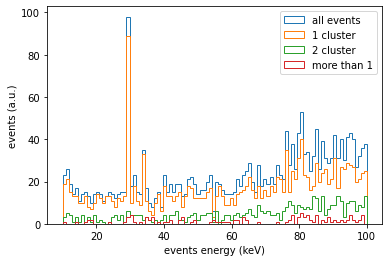

In [110]:
plt.hist(hits_energy, bins = 100, range=(10,100), histtype='step', label = 'all events')
plt.hist(only1cluster_energy, bins = 100, range=(10,100), histtype='step', label = '1 cluster')
plt.hist(twocluster_energy, bins = 100, range=(10,100), histtype='step', label = '2 cluster')
plt.hist(morethan2cluster_energy, bins = 100, range=(10,100),histtype='step', label = 'more than 1')

plt.xlabel('events energy (keV)')
plt.ylabel('events (a.u.)')

#plt.yscale('log')
plt.legend(loc=1);
plt.show()

/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/halmamol/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


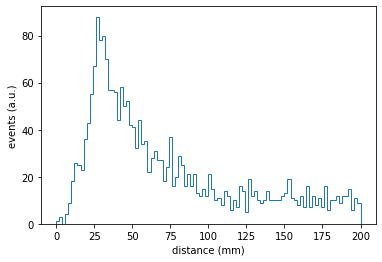

In [75]:
plt.hist(dCluster, bins = 100, range = (0,200), histtype='step')

plt.xlabel('distance (mm)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

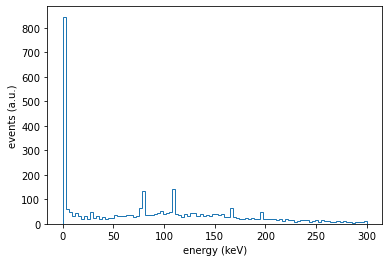

In [76]:
plt.hist(ClusterA_e_total, bins = 100, range = (0,300), histtype='step')

plt.xlabel('energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

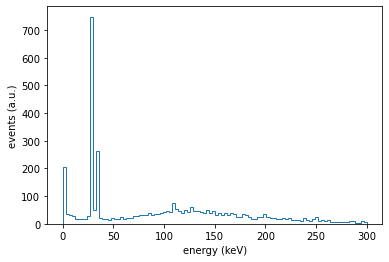

In [77]:
plt.hist(ClusterB_e_total, bins = 100, range = (0,300), histtype='step')

plt.xlabel('energy (keV)')
plt.ylabel('events (a.u.)')
#plt.yscale("log")
plt.show()

In [78]:
evt_hits = hits[hits.event_id == 2]
evt_hits = evt_hits[evt_hits.label == 'ACTIVE']

xt = evt_hits.x
yt = evt_hits.y
zt = evt_hits.z
et = evt_hits.energy*1000
rt = np.sqrt(xt**2+yt**2)
evt_hits

,event_id,x,y,z,time,energy,label,particle_id,hit_id
436,2,103.423027,176.714127,188.603714,293.604004,0.000024,ACTIVE,22,0
437,2,103.477463,176.699600,188.631622,293.604553,0.001418,ACTIVE,123,0
438,2,103.542252,176.673218,188.693542,293.605438,0.001838,ACTIVE,123,1
439,2,103.618324,176.665833,188.733170,293.606232,0.003686,ACTIVE,123,2
440,2,103.610352,176.706024,188.792572,293.606964,0.003744,ACTIVE,123,3
441,2,103.564445,176.736557,188.813797,293.607574,0.003935,ACTIVE,123,4
442,2,103.519165,176.738678,188.803513,293.608093,0.004981,ACTIVE,123,5
443,2,103.488197,176.747910,188.801193,293.608521,0.001894,ACTIVE,123,6
444,2,103.467499,176.764557,188.808624,293.608887,0.000492,ACTIVE,123,7
445,2,103.458939,176.761993,188.833450,293.609222,0.000466,ACTIVE,123,8


In [79]:
for i in range(0,len(rt)):
    print(f'(x,y)=({rt.values[i]},{zt.values[i]})')

(x,y)=(204.75401306152344,188.6037139892578)
(x,y)=(204.7689666748047,188.63162231445312)
(x,y)=(204.77896118164062,188.69354248046875)
(x,y)=(204.81106567382812,188.73316955566406)
(x,y)=(204.84170532226562,188.79257202148438)
(x,y)=(204.84483337402344,188.8137969970703)
(x,y)=(204.8237762451172,188.8035125732422)
(x,y)=(204.81610107421875,188.8011932373047)
(x,y)=(204.82000732421875,188.80862426757812)
(x,y)=(204.81346130371094,188.8334503173828)
(x,y)=(204.8191680908203,188.8370819091797)
(x,y)=(204.80804443359375,188.82855224609375)
(x,y)=(204.81106567382812,188.83523559570312)
(x,y)=(204.8084259033203,188.8394775390625)
(x,y)=(204.81155395507812,188.83970642089844)
(x,y)=(204.81190490722656,188.839599609375)


In [80]:
def sorter(item):
    # Since highest marks first, least error = most marks
    z = 500 - item[1]
    r = 200 - item[0]
    return (r, z)

participant_list = [(rt, zt)]


In [81]:
rt

436    204.754013
437    204.768967
438    204.778961
439    204.811066
440    204.841705
441    204.844833
442    204.823776
443    204.816101
444    204.820007
445    204.813461
446    204.819168
447    204.808044
448    204.811066
449    204.808426
450    204.811554
451    204.811905
dtype: float32

In [82]:
sorted_list = sorted(participant_list, reverse=True)
participant_list

[(436    204.754013
  437    204.768967
  438    204.778961
  439    204.811066
  440    204.841705
  441    204.844833
  442    204.823776
  443    204.816101
  444    204.820007
  445    204.813461
  446    204.819168
  447    204.808044
  448    204.811066
  449    204.808426
  450    204.811554
  451    204.811905
  dtype: float32,
  436    188.603714
  437    188.631622
  438    188.693542
  439    188.733170
  440    188.792572
  441    188.813797
  442    188.803513
  443    188.801193
  444    188.808624
  445    188.833450
  446    188.837082
  447    188.828552
  448    188.835236
  449    188.839478
  450    188.839706
  451    188.839600
  Name: z, dtype: float32)]

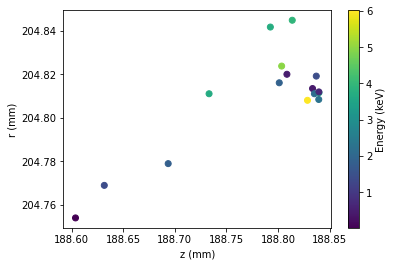

In [83]:
fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

plt.scatter(zt, rt, cmap='viridis', c=et)
plt.xlabel('z (mm)')
plt.ylabel('r (mm)')

cb = plt.colorbar(label='Energy (keV)')
plt.show()